In [1]:
from autogluon.vision import ImagePredictor
import pandas as pd
import os

c:\Users\smedy\miniconda3\envs\ag38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:datasets:PyTorch version 1.13.1 available.


In [29]:
import matplotlib.pyplot as plt
import cv2

In [3]:
dataset_path = 'C:\\Users\\smedy\\OneDrive\\Pulpit\\suml\\archive\\images\\images\\train\\'

In [4]:
def prepare_data(dataset_path):
    data = []
    for emotion in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion)
        if os.path.isdir(emotion_path):
            for img in os.listdir(emotion_path):
                img_path = os.path.join(emotion_path, img)
                data.append([img_path, emotion])
    return pd.DataFrame(data, columns=['image', 'label'])

In [5]:
train_data = prepare_data(dataset_path)

In [6]:
# Podział danych na treningowe i walidacyjne
train_data = train_data.sample(frac=1).reset_index(drop=True)
split_idx = int(0.8 * len(train_data))
train_df, val_df = train_data[:split_idx], train_data[split_idx:]

In [7]:
predictor = ImagePredictor(label='label', problem_type='multiclass', eval_metric='accuracy', verbosity=2)

AutoGluon ImagePredictor will be deprecated in v0.7. Please use AutoGluon MultiModalPredictor instead for more functionalities and better support. Visit https://auto.gluon.ai/stable/tutorials/multimodal/index.html for more details! 


In [8]:
predictor.fit(train_data=train_df, time_limit=3600)

Converting raw DataFrame to ImageDataset...
Detected 5 unique classes: ['angry', 'happy', 'neutral', 'sad', 'surprise']
If you feel the `classes` is inaccurate, please construct the dataset explicitly, e.g. train_data = ImageDataset(train_data, classes=["foo", "bar"])
Randomly split train_data into train[1912]/validation[213] splits.
Reset labels to [0, 1, 2, 3, 4]
No GPU detected/allowed, using most conservative search space.
Starting fit without HPO
INFO:TorchImageClassificationEstimator:modified configs(<old> != <new>): {
INFO:TorchImageClassificationEstimator:root.misc.num_workers 4 != 8
INFO:TorchImageClassificationEstimator:root.misc.seed       42 != 694
INFO:TorchImageClassificationEstimator:root.train.epochs    200 != 5
INFO:TorchImageClassificationEstimator:root.train.early_stop_baseline 0.0 != -inf
INFO:TorchImageClassificationEstimator:root.train.early_stop_max_value 1.0 != inf
INFO:TorchImageClassificationEstimator:root.train.batch_size 32 != 16
INFO:TorchImageClassificatio

In [36]:
predictor.fit_summary()

{'train_acc': 0.3960084033613445,
 'valid_acc': 0.511737089341795,
 'total_time': 1581.6162567138672,
 'best_config': {'model': 'resnet18',
  'lr': 0.01,
  'epochs': 5,
  'batch_size': 16,
  'nthreads_per_trial': 32,
  'ngpus_per_trial': 0,
  'time_limits': 3600,
  'dist_ip_addrs': None,
  'searcher': 'random',
  'early_stop_patience': 10,
  'early_stop_baseline': -inf,
  'early_stop_max_value': inf,
  'num_workers': 8,
  'gpus': [],
  'seed': 694,
  'final_fit': False},
 'fit_history': {'train_acc': 0.3960084033613445,
  'valid_acc': 0.511737089341795,
  'total_time': 1581.6162567138672,
  'best_config': {'model': 'resnet18',
   'lr': 0.01,
   'epochs': 5,
   'batch_size': 16,
   'nthreads_per_trial': 32,
   'ngpus_per_trial': 0,
   'time_limits': 3600,
   'dist_ip_addrs': None,
   'searcher': 'random',
   'early_stop_patience': 10,
   'early_stop_baseline': -inf,
   'early_stop_max_value': inf,
   'num_workers': 8,
   'gpus': [],
   'seed': 694,
   'final_fit': False}}}

In [38]:
predictor.list_models()

('adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

In [9]:
predictor.save('image_predictor')

In [49]:
test_images = ['C:\\Users\\smedy\\OneDrive\\Pulpit\\suml\\archive\\images\\images\\validation\\angry\\1340.jpg',
                'C:\\Users\\smedy\\OneDrive\\Pulpit\\suml\\archive\\images\\images\\validation\\happy\\30.jpg',
               'C:\\Users\\smedy\\OneDrive\\Pulpit\\suml\\archive\\images\\images\\validation\\sad\\580.jpg',
               'C:\\Users\\smedy\\OneDrive\\Pulpit\\suml\\archive\\images\\images\\validation\\surprise\\176.jpg',
               'C:\\Users\\smedy\\OneDrive\\Pulpit\\suml\\archive\\images\\images\\validation\\neutral\\217.jpg'
               ]

In [50]:
valid_images = [img for img in test_images if os.path.exists(img)]

C:\Users\smedy\OneDrive\Pulpit\suml\archive\images\images\validation\angry\1340.jpg


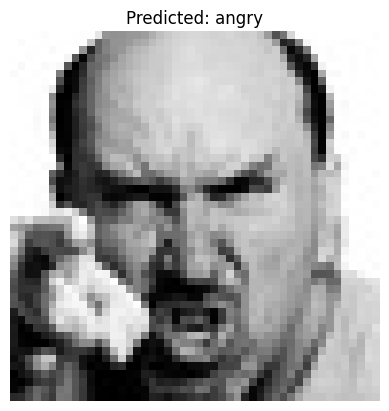

C:\Users\smedy\OneDrive\Pulpit\suml\archive\images\images\validation\happy\30.jpg


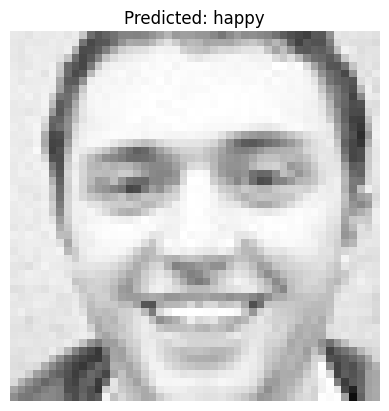

C:\Users\smedy\OneDrive\Pulpit\suml\archive\images\images\validation\sad\580.jpg


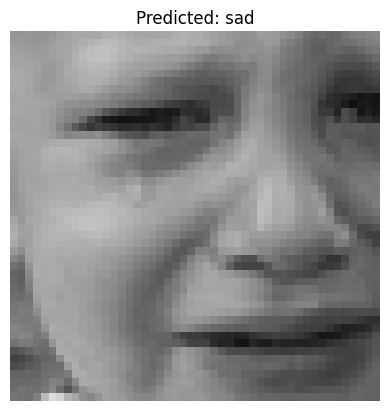

C:\Users\smedy\OneDrive\Pulpit\suml\archive\images\images\validation\surprise\176.jpg


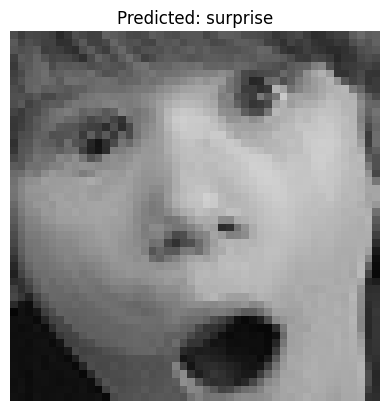

C:\Users\smedy\OneDrive\Pulpit\suml\archive\images\images\validation\neutral\217.jpg


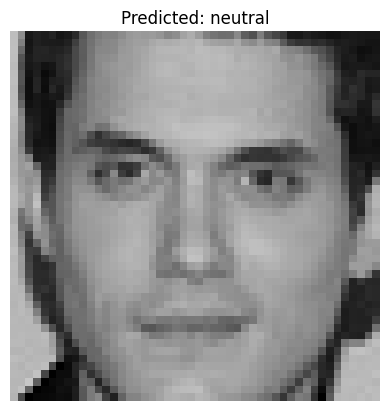

In [51]:
if valid_images:
    test_df = pd.DataFrame(valid_images, columns=['image'])
    predictions = predictor.predict(test_df)
    
    for img_path, pred in zip(valid_images, predictions):
        print(img_path)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konwersja koloru BGR do RGB
        plt.figure()
        plt.imshow(img)
        plt.title(f'Predicted: {pred}')
        plt.axis('off')
        plt.show()
else:
    print("No valid images found.")

In [45]:
if valid_images:
    test_df = pd.DataFrame(valid_images, columns=['image'])
    predictions = predictor.predict(test_df)
    probabilities = predictor.predict_proba(test_df)
    features = predictor.predict_feature(test_df)
    print(predictions)
    print(probabilities)
    print(features)
else:
    print("No valid images found.")

0       angry
1       happy
2         sad
3    surprise
4     neutral
Name: label, dtype: object
      angry     happy   neutral       sad  surprise
0  0.299793  0.052369  0.234612  0.255665  0.157561
1  0.157333  0.448879  0.188746  0.133688  0.071354
2  0.172354  0.118559  0.247794  0.257695  0.203598
3  0.023040  0.001794  0.167337  0.000101  0.807727
4  0.129563  0.078210  0.433139  0.147602  0.211486
                                       image_feature  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.123...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17666459, 0.0...   
2  [0.0016384721, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...   
3  [0.3291142, 0.0, 2.0195012, 8.437266, 11.05178...   
4  [0.21246412, 0.44456175, 0.0, 0.0, 0.0, 0.0, 0...   

                                               image  
0  C:\Users\smedy\OneDrive\Pulpit\suml\archive\im...  
1  C:\Users\smedy\OneDrive\Pulpit\suml\archive\im...  
2  C:\Users\smedy\OneDrive\Pulpit\suml\archive\im...  
3  C:\Users\smedy\OneDrive\Pulpit\